In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('tornadoes.csv')

In [4]:
#Dropped date, state, loss, datetime_utc, tz, f1, f2, f3, f4, fc, sn, slat, slon, elat, elon
df = df.drop(['date','stf','loss','datetime_utc','tz','f1','f2','f3','f4','fc','sn','slat','slon','elat','elon'],axis=1)

In [5]:
#converting time column from hh-mm-ss string to just the hour
df['time'] = df['time'].astype(str).str[0:2].astype(int)

In [6]:
#encoding the state abbreviation string columns and I'm not using pd.get_dummies() because that gave me 50 more columns
state_abbreviations = {
    'AL': 1, 'AK': 2, 'AZ': 3, 'AR': 4, 'CA': 5, 'CO': 6, 'CT': 7, 'DE': 8, 'FL': 9, 'GA': 10,
    'HI': 11, 'ID': 12, 'IL': 13, 'IN': 14, 'IA': 15, 'KS': 16, 'KY': 17, 'LA': 18, 'ME': 19, 'MD': 20,
    'MA': 21, 'MI': 22, 'MN': 23, 'MS': 24, 'MO': 25, 'MT': 26, 'NE': 27, 'NV': 28, 'NH': 29, 'NJ': 30,
    'NM': 31, 'NY': 32, 'NC': 33, 'ND': 34, 'OH': 35, 'OK': 36, 'OR': 37, 'PA': 38, 'RI': 39, 'SC': 40,
    'SD': 41, 'TN': 42, 'TX': 43, 'UT': 44, 'VT': 45, 'VA': 46, 'WA': 47, 'WV': 48, 'WI': 49, 'WY': 50,
    'PR': 51, 'DC': 52, 'VI':53
}

df['st'] = df['st'].replace(state_abbreviations)

In [7]:
#converting length and width column into area column
df['wid'] = df['wid']/1760
df['len'] = df['wid'] * df['len']
df = df.drop(columns=['wid'])
df = df.rename(columns={'len':'area(sqmi)'})

In [8]:
#Dropping rows with NaN values in the mag column
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67937 entries, 0 to 68692
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   om          67937 non-null  int64  
 1   yr          67937 non-null  int64  
 2   mo          67937 non-null  int64  
 3   dy          67937 non-null  int64  
 4   time        67937 non-null  int32  
 5   st          67937 non-null  int64  
 6   mag         67937 non-null  float64
 7   inj         67937 non-null  int64  
 8   fat         67937 non-null  int64  
 9   area(sqmi)  67937 non-null  float64
 10  ns          67937 non-null  int64  
dtypes: float64(2), int32(1), int64(8)
memory usage: 6.0 MB


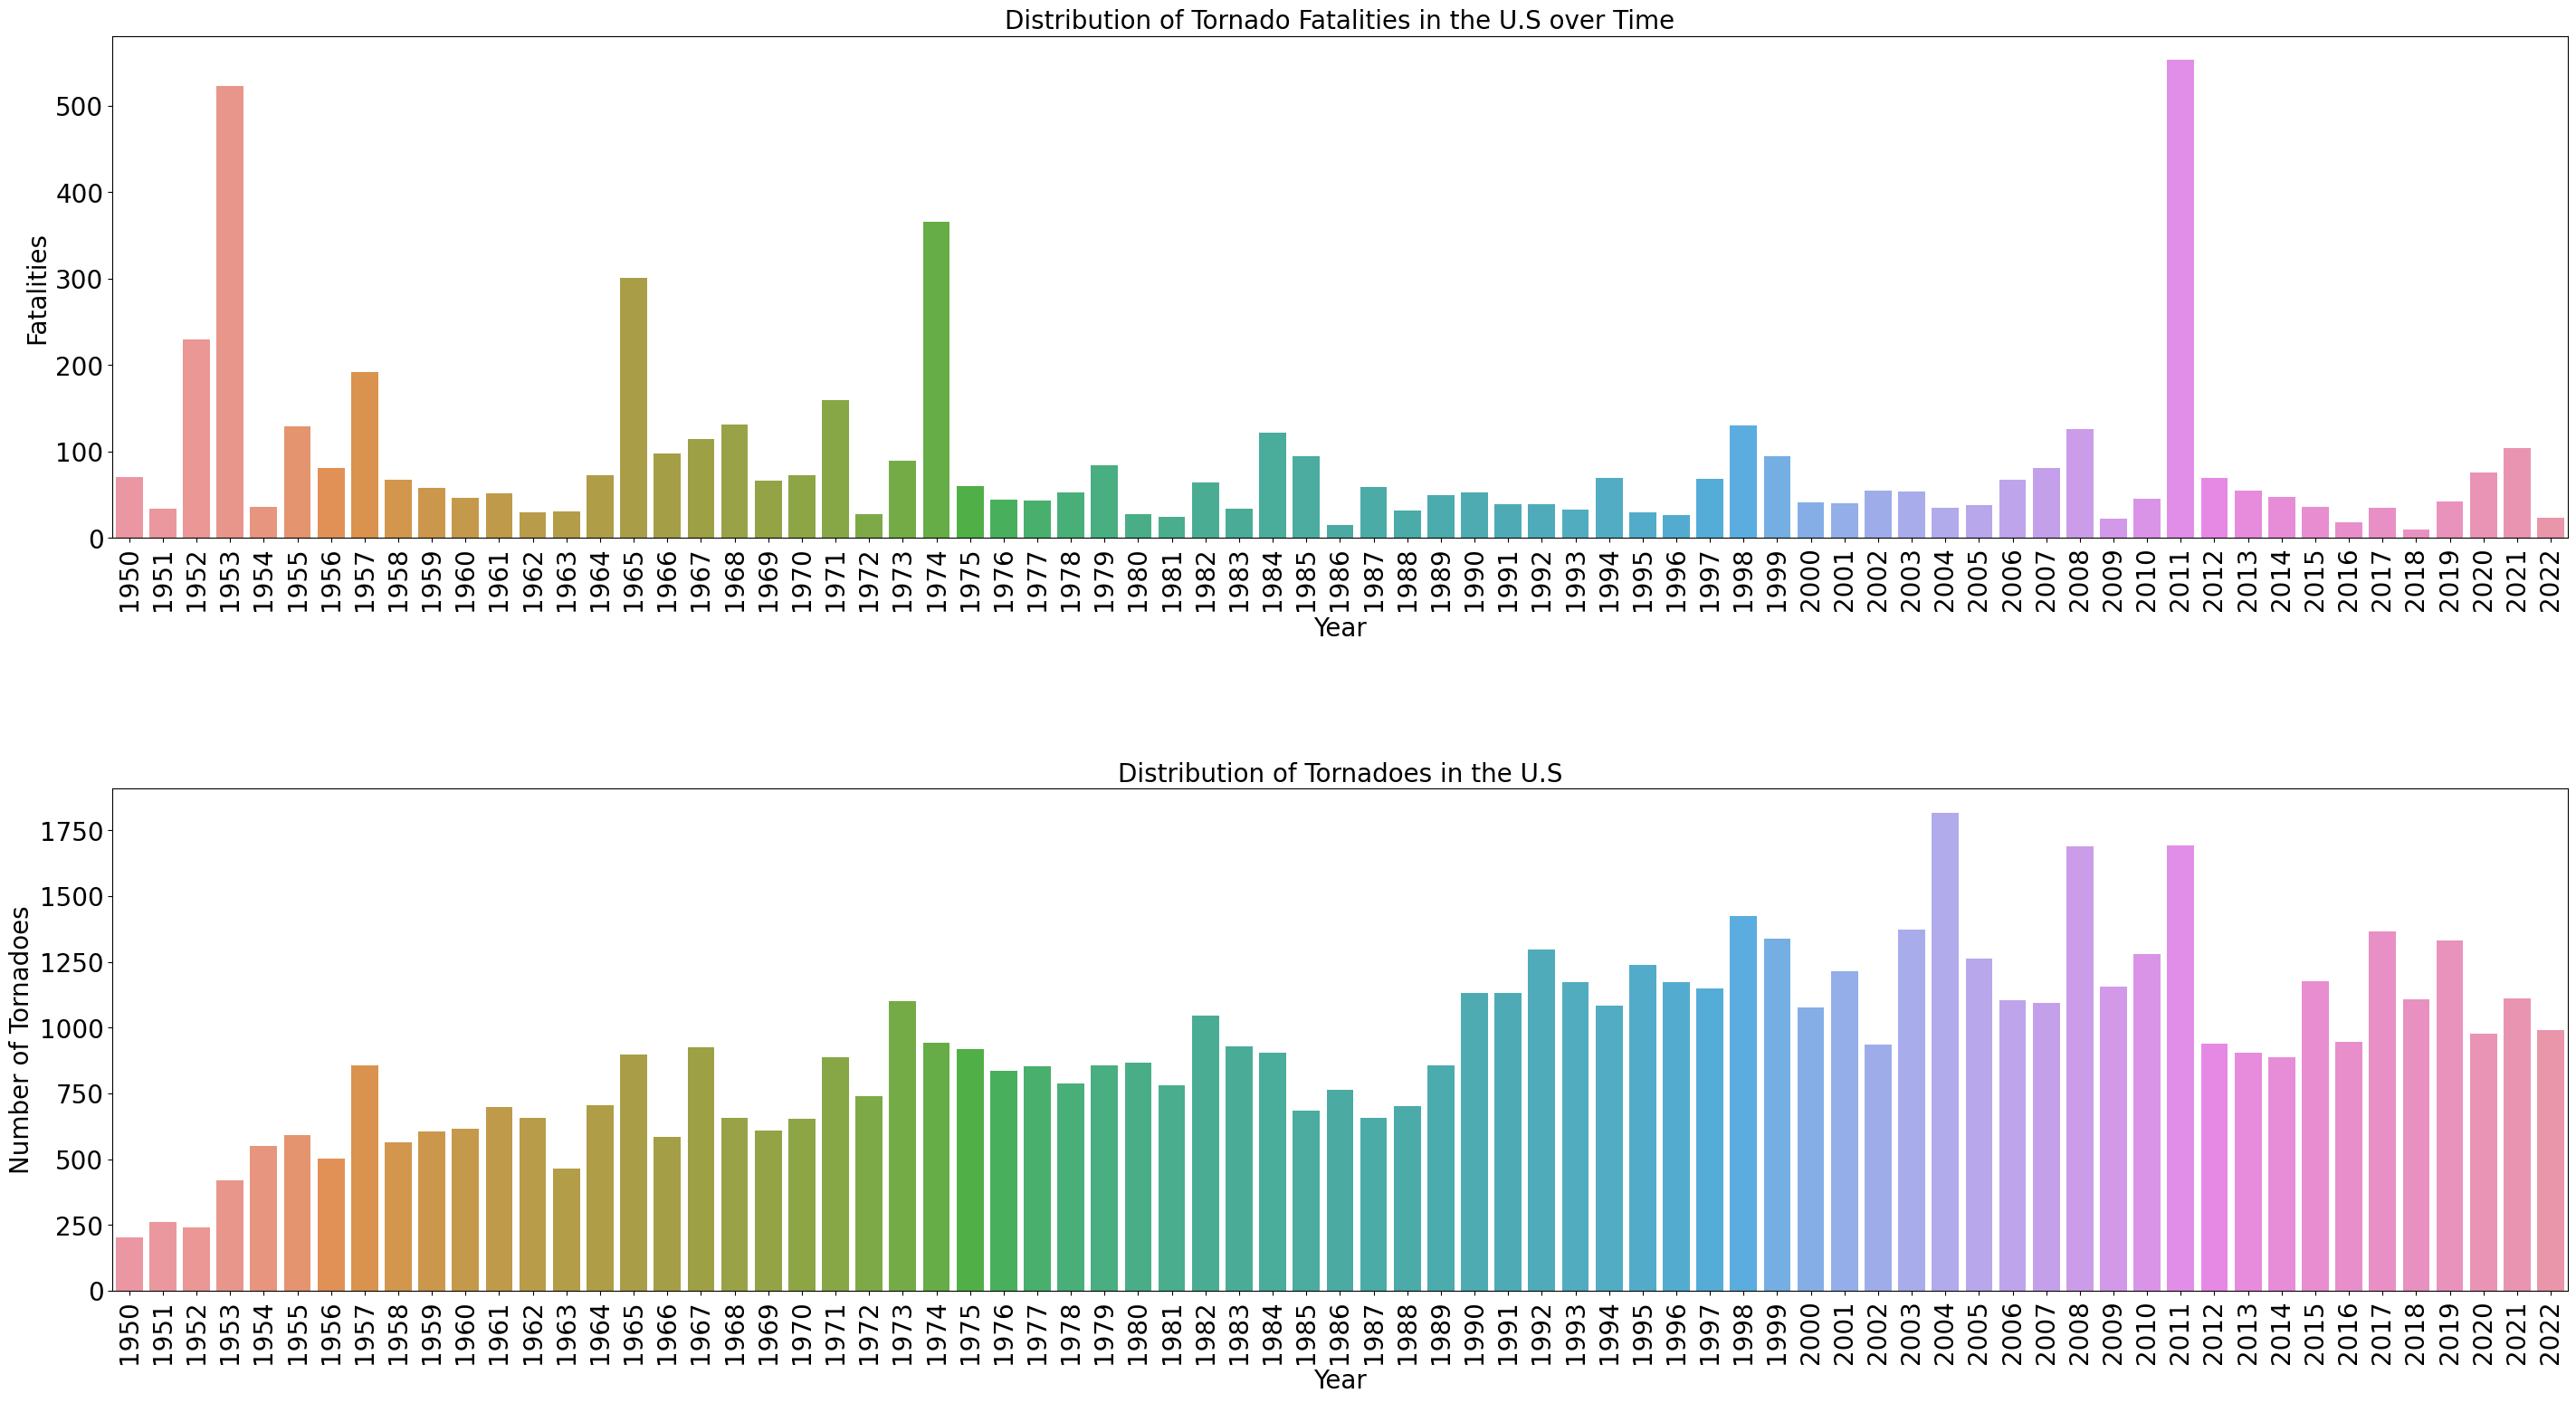

In [10]:
fatalities = df.groupby('yr')['fat'].sum().reset_index()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(35, 18))
#Fatalities over Time Visualization
sns.barplot(x=fatalities['yr'], y=fatalities['fat'], ax=axes[0], errorbar=None)
axes[0].set_title('Distribution of Tornado Fatalities in the U.S over Time', fontsize=20)
axes[0].set_xlabel('Year', fontsize=20)
axes[0].set_ylabel('Fatalities', fontsize=20)
axes[0].tick_params(axis='x', labelsize=20, rotation=90)
axes[0].tick_params(axis='y', labelsize=20)



#Distribution of Tornadoes Visualization
sns.countplot(x=df['yr'], ax=axes[1])
axes[1].set_title('Distribution of Tornadoes in the U.S', fontsize=20)
axes[1].set_xlabel('Year', fontsize=20)
axes[1].set_ylabel('Number of Tornadoes', fontsize=20)
axes[1].tick_params(axis='x', labelsize=20, rotation=90)
axes[1].tick_params(axis='y', labelsize=20)

plt.subplots_adjust(hspace=0.5)

In [ ]:
sns.pairplot(df, kind='reg')

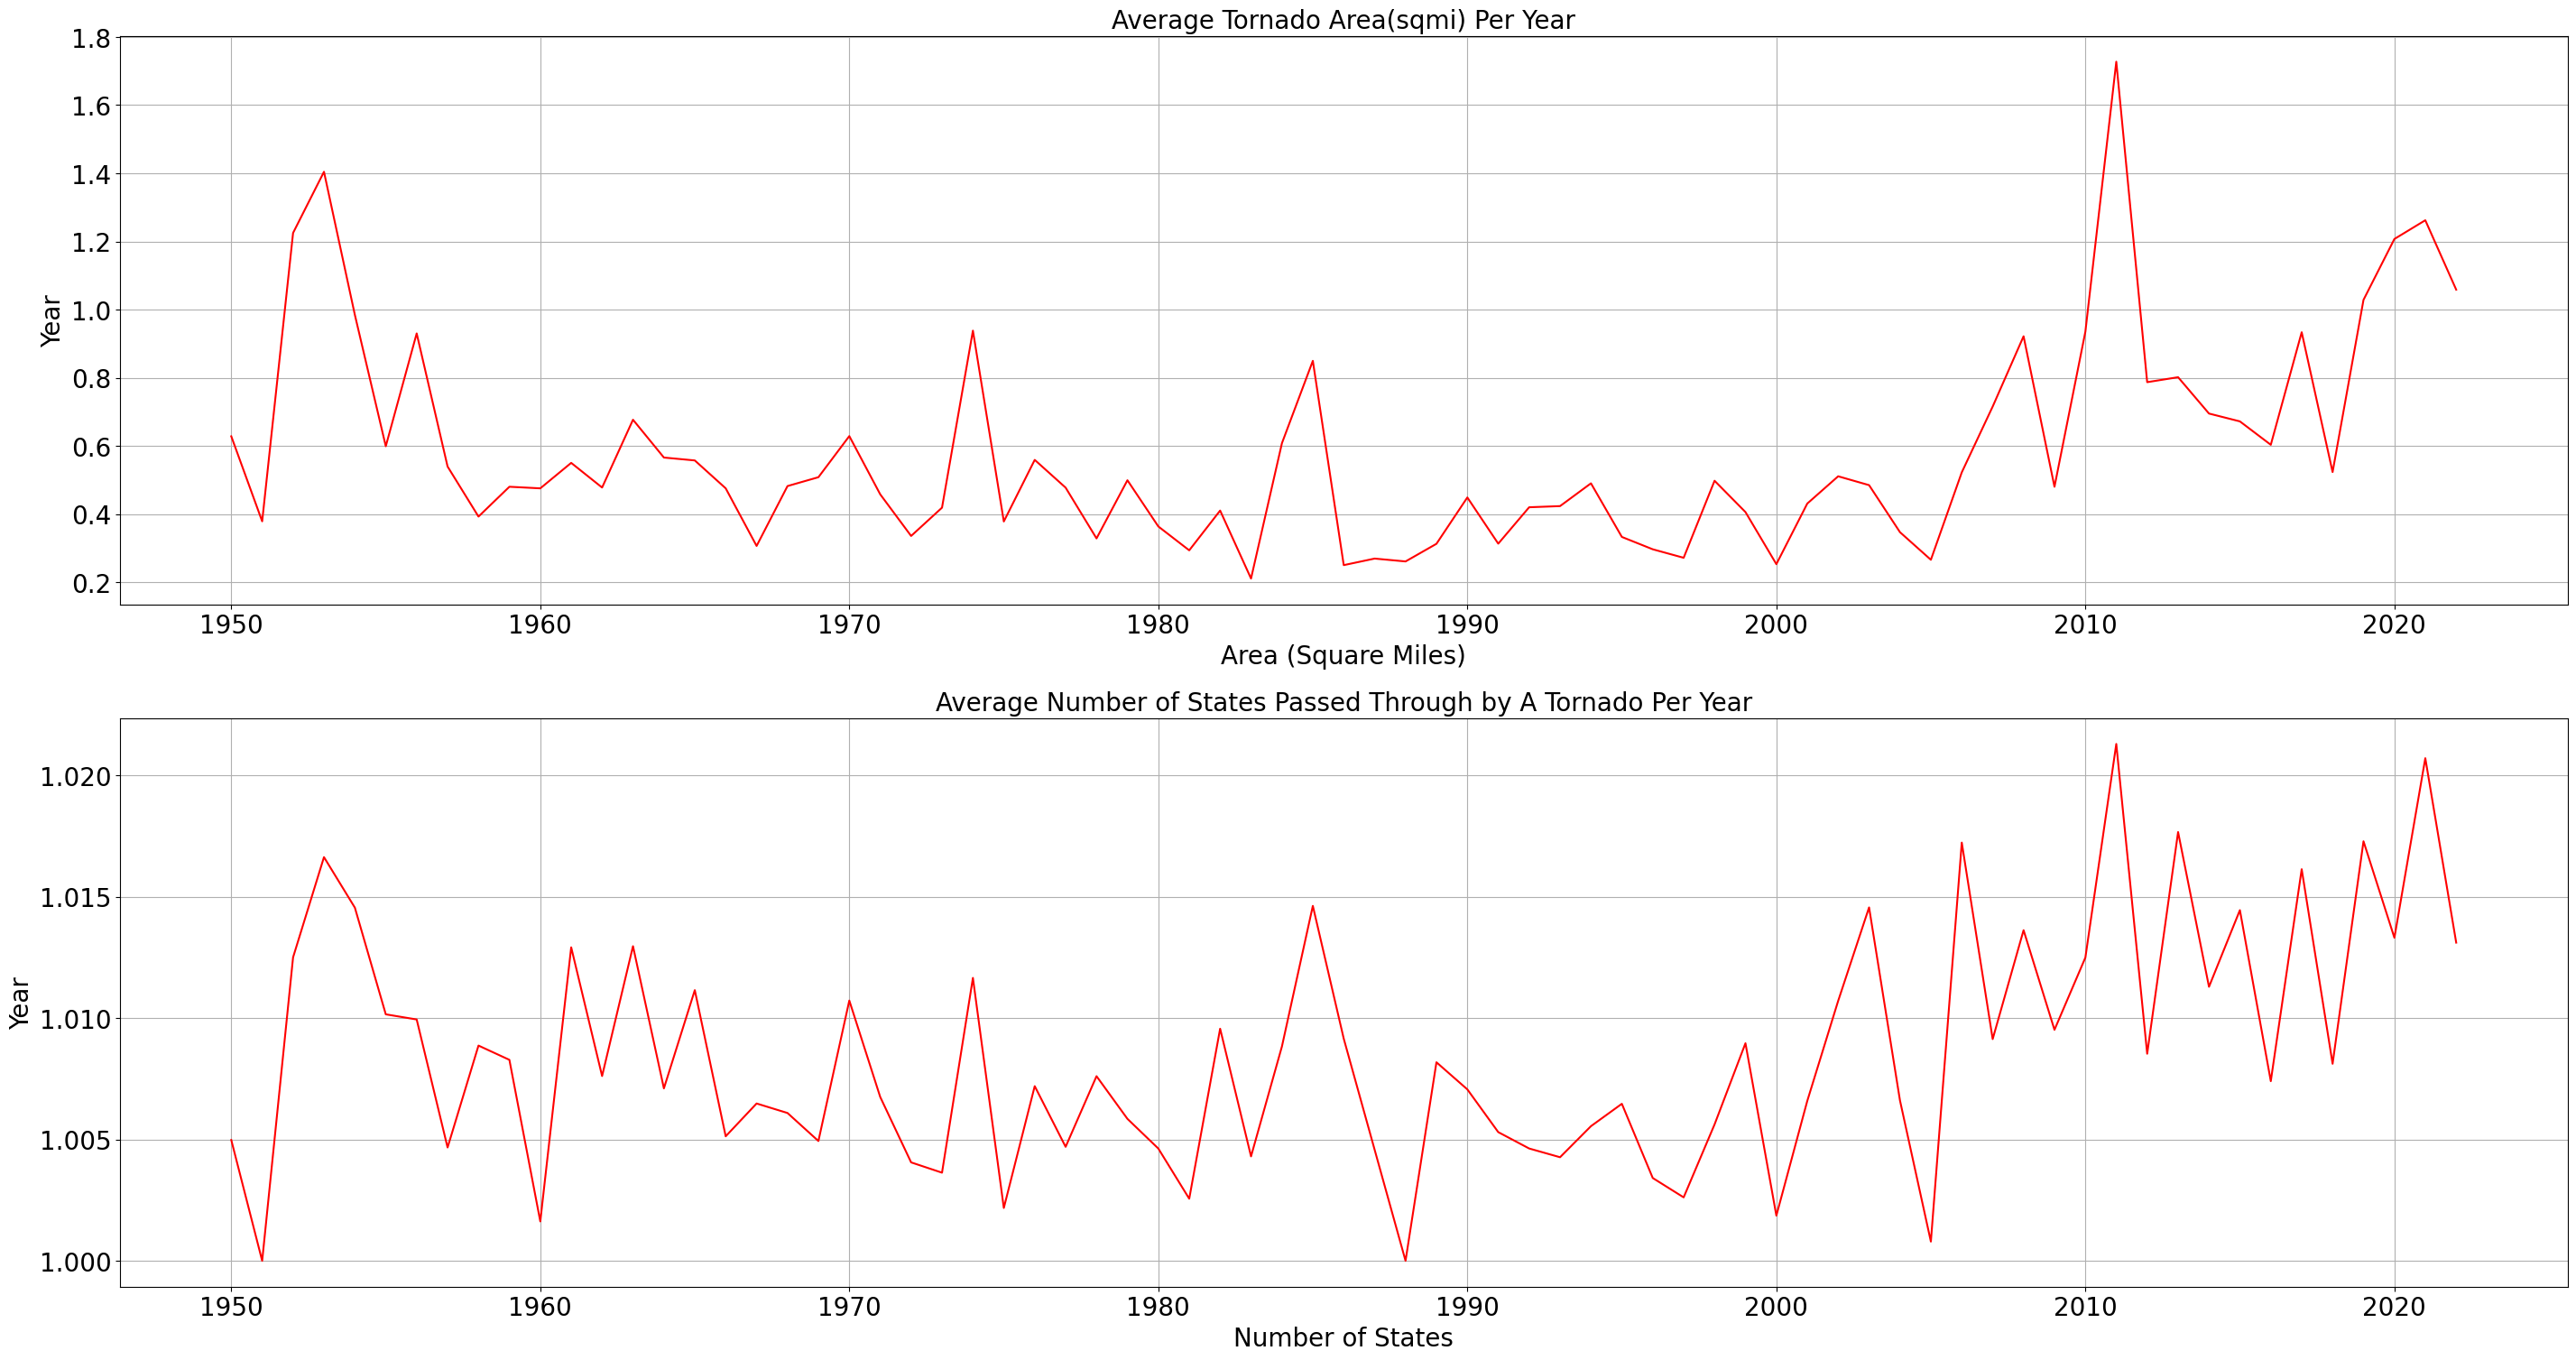

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(35, 18))
area_mean = df.groupby('yr')['area(sqmi)'].mean().reset_index()
ns_mean = df.groupby('yr')['ns'].mean().reset_index()



sns.lineplot(x=area_mean['yr'], y=area_mean['area(sqmi)'], ax=axes[0], errorbar=None,color='red')
axes[0].set_title('Average Tornado Area(sqmi) Per Year', fontsize=20)
axes[0].set_xlabel('Area (Square Miles)', fontsize=20)
axes[0].set_ylabel('Year', fontsize=20)
axes[0].tick_params(axis='x', labelsize=20)
axes[0].tick_params(axis='y', labelsize=20)
axes[0].grid(True)


sns.lineplot(x=ns_mean['yr'], y=ns_mean['ns'], ax=axes[1], errorbar=None, color='red')
axes[1].set_title('Average Number of States Passed Through by A Tornado Per Year', fontsize=20)
axes[1].set_xlabel('Number of States', fontsize=20)
axes[1].set_ylabel('Year', fontsize=20)
axes[1].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='y', labelsize=20)
axes[1].grid(True)

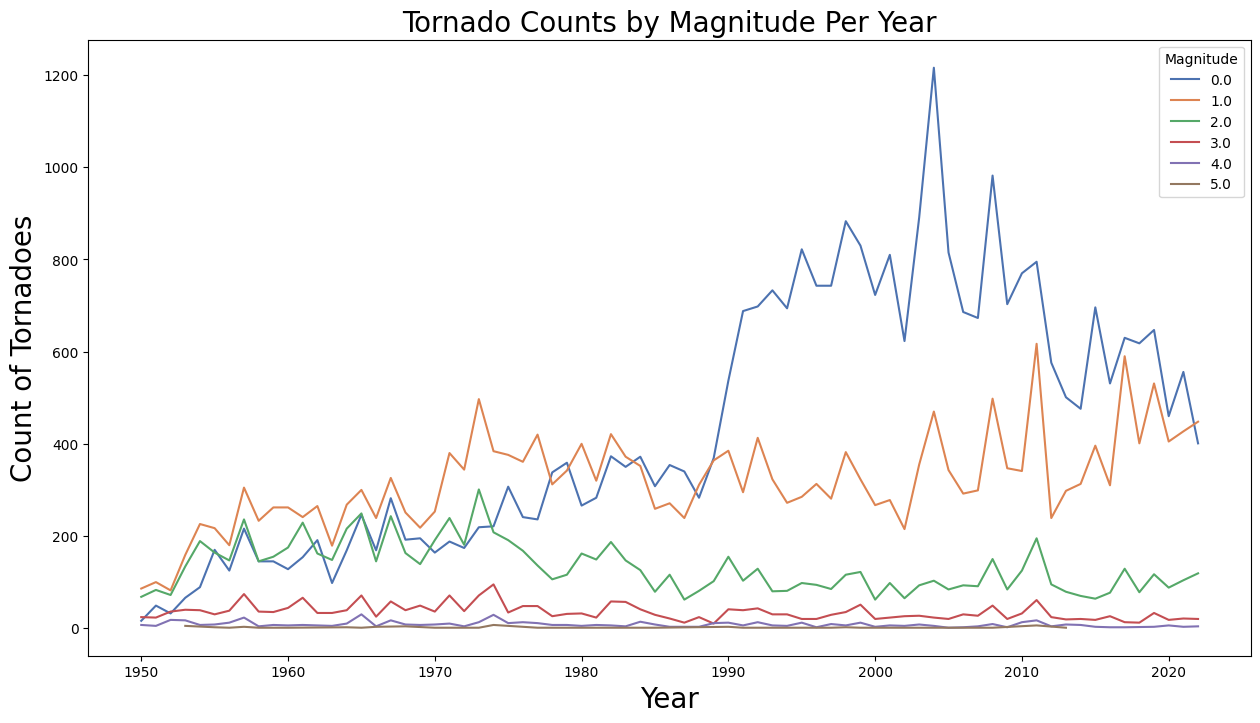

In [39]:
counts = df.groupby(['yr', 'mag']).size().reset_index(name='Count')

# Create a line plot with different colors for each magnitude
plt.figure(figsize=(15,8))
sns.lineplot(x='yr', y='Count', hue='mag', data=counts, palette='deep')

# Customize the plot
plt.title('Tornado Counts by Magnitude Per Year', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Count of Tornadoes', fontsize=20)
plt.legend(title='Magnitude')

# Show the plot
plt.show()